<a href="https://colab.research.google.com/github/Sattar78617862/Implementation-of-ML-model-for-image-classification-project--1-sattar/blob/main/Implementation-of-ML-model-for-image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Building and Evaluating ML Models for CIFAR-10 Image **Classification**

In [ ]:
# Install required packages
!pip install tensorflow matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


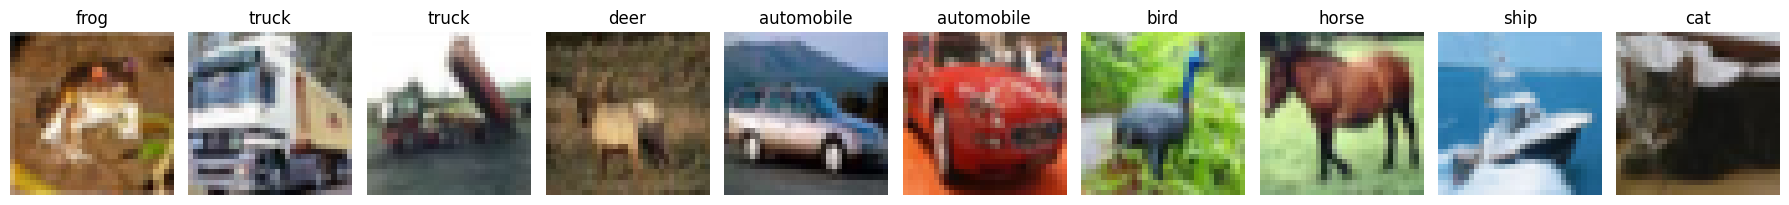

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the first 10 training images
fig, axes = plt.subplots(1, 10, figsize=(18, 5))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(class_labels[y_train[i][0]])
plt.tight_layout()
plt.show()


In [ ]:
# Normalize image data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print dataset dimensions for verification
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2776 - loss: 2.1605 - val_accuracy: 0.3261 - val_loss: 1.8147
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3869 - loss: 1.7175 - val_accuracy: 0.4130 - val_loss: 1.6351
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4161 - loss: 1.6375 - val_accuracy: 0.4153 - val_loss: 1.6173
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4345 - loss: 1.5909 - val_accuracy: 0.4375 - val_loss: 1.5752
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4535 - loss: 1.5424 - val_accuracy: 0.4396 - val_loss: 1.5523
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4537 - loss: 1.5343 - val_accuracy: 0.4539 - val_loss: 1.5264
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4692 - loss: 1.4965 - val_accuracy: 0.4528 - val_loss: 1.5507
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4652 - loss: 1.4979 - val_acc

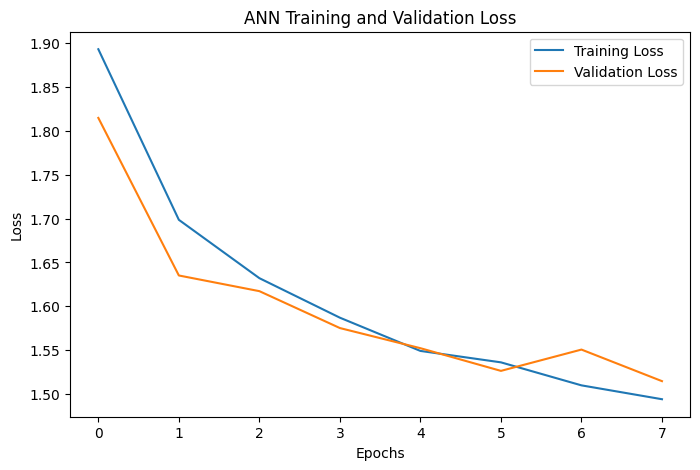

In [ ]:
# Build ANN model
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),  # Reduced hidden units for faster training
    Dense(10, activation='softmax')
])

# Compile the ANN model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history_mlp = mlp_model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))  # Reduced epochs for quick testing

# Plot training and validation loss for ANN
plt.figure(figsize=(8, 5))
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3618 - loss: 1.7439 - val_accuracy: 0.5763 - val_loss: 1.1700
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5914 - loss: 1.1522 - val_accuracy: 0.6710 - val_loss: 0.9410
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6665 - loss: 0.9601 - val_accuracy: 0.6985 - val_loss: 0.8583
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7070 - loss: 0.8451 - val_accuracy: 0.7083 - val_loss: 0.8311
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7332 - loss: 0.7581 - val_accuracy: 0.7259 - val_loss: 0.7858
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7592 - loss: 0.6906 - val_accuracy: 0.7310 - val_loss: 0.8128
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7782 - loss: 0.6328 - val_accuracy: 0.7314 - val_loss: 0.8027
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7958 - loss: 0.5774 - val

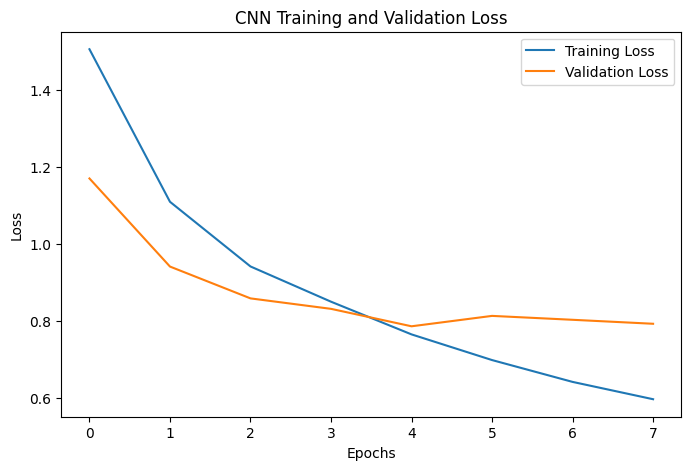

In [ ]:
# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Adjusted to improve learning
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))  # Reduced epochs for testing

# Plot training and validation loss for CNN
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7381 - loss: 0.7847


Test Accuracy (CNN): 73.66%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


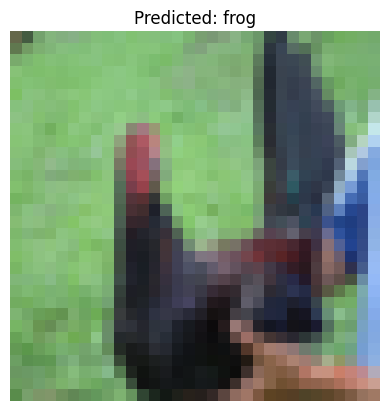

In [ ]:
# Evaluate CNN model performance
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy (CNN): {test_accuracy * 100:.2f}%")

# Save the CNN model
cnn_model.save('cifar10_image_classifier.h5')

# Load and make predictions with the saved model
loaded_model = tf.keras.models.load_model('cifar10_image_classifier.h5')
test_sample = np.expand_dims(x_test[25], axis=0)  # Predict for a random test image

# Get prediction probabilities and predicted class
predictions = loaded_model.predict(test_sample)
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Display the test sample with the predicted label
plt.imshow(x_test[25])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
